<a href="https://colab.research.google.com/github/MK396/SiOC/blob/main/demozaikowanie.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
from skimage import io
from scipy import ndimage
from scipy.ndimage import convolve

(400, 600, 3)

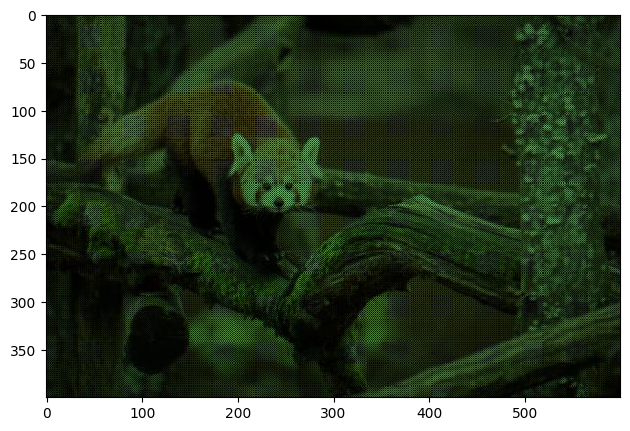

In [ ]:
# Wczytanie zmozaikowanego obrazu, który jest w masce Bayera
obraz_bayer = io.imread("/content/drive/MyDrive/CFA/Bayer/panda.jpg")
_ = io.imshow(obraz_bayer)
obraz_bayer.shape

In [ ]:
# Stworzenie maski konwolucji o wzmocnianiach dla kanałów R, G, B
maska_konwolucji = np.dstack([
    np.ones([2, 2]),        # R
    0.5 * np.ones([2, 2]),  # G
    np.ones([2, 2]),        # B
])

(400, 600, 3)

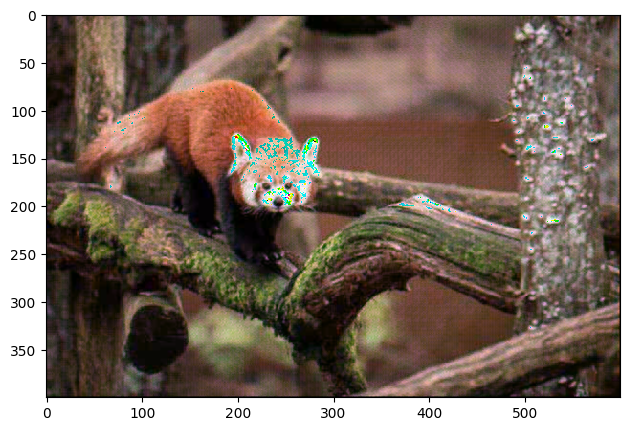

In [ ]:
# Wykorzystanie konwolucji 2D do przeprowadzenia demozaikowania na każdym kanale koloru
obraz_demozaikowany = np.dstack([
    ndimage.convolve(obraz_bayer[:, :, channel], maska_konwolucji[:, :, channel], mode="constant", cval=0.0)
    for channel in range(3)
])
_ = io.imshow(obraz_demozaikowany)
obraz_demozaikowany.shape

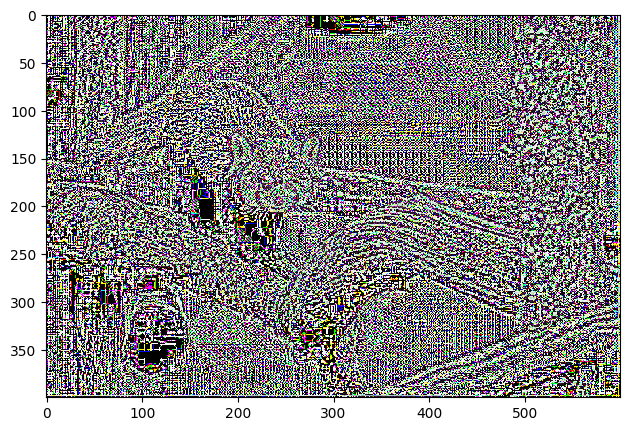

In [ ]:
# Wykrywanie krawędzi za pomocą filtru Laplaca
filtr_laplace = np.array([[0, 1, 0], [1, -4, 1], [0, 1, 0]])
obraz_krawedzie_Laplace = np.dstack([
    convolve(obraz_demozaikowany[:, :, channel], filtr_laplace, mode="constant", cval=0.0)
    for channel in range(3)
])

io.imshow(obraz_krawedzie_Laplace)

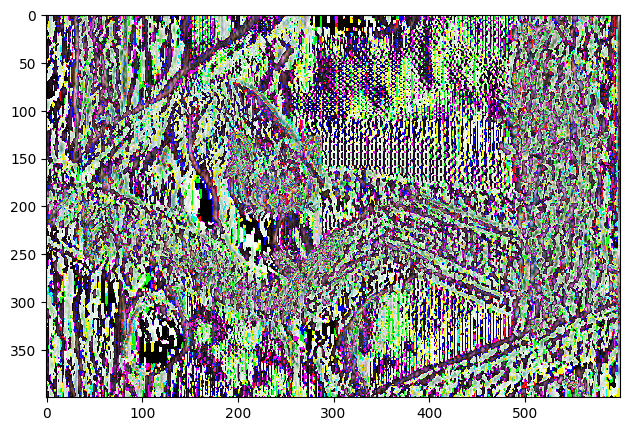

In [ ]:
# Wykrywanie krawędzi za pomocą filtru Sobela
obraz_krawedzie_Sobel = np.dstack([
    ndimage.sobel(obraz_demozaikowany[:, :, channel])
    for channel in range(3)
])

io.imshow(obraz_krawedzie_Sobel)

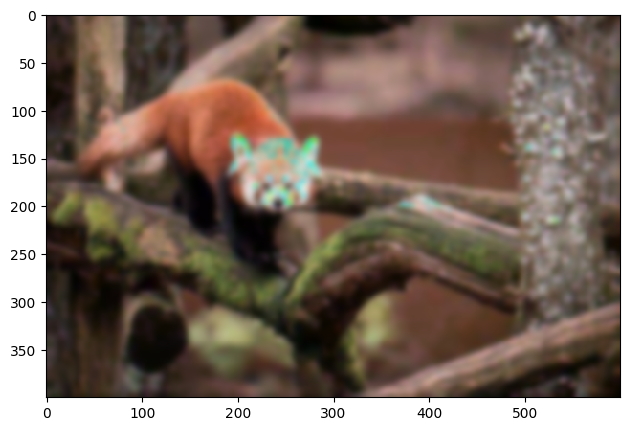

In [ ]:
# Rozmywanie za pomocą filtru Gaussa
rozmycie = 3  # kontrolowanie rozmycia
obraz_rozmyty = np.dstack([
    ndimage.gaussian_filter(obraz_demozaikowany[:, :, channel], rozmycie)
    for channel in range(3)
])

io.imshow(obraz_rozmyty)

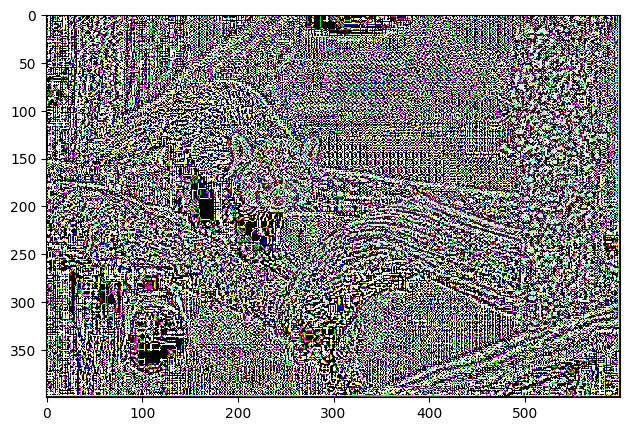

In [ ]:
# Wyostrzanie za pomocą filtru Laplace'a
obraz_wyostrozony = np.dstack([
    ndimage.laplace(obraz_demozaikowany[:, :, channel])
    for channel in range(3)
])

io.imshow(obraz_wyostrozony)